# 2. Practical Part

## 1. Ridge Regression

We implement ridge regression as `regression_gradient`, a function of a `gradDescent` class:

In [661]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(1)


class gradDescent():
    def __init__(self, weightedDecay = 0.01, stepSize = 0.01, numberSteps = 4000):
        self.weightedDecay = weightedDecay
        self.stepSize = stepSize
        self.numberSteps = numberSteps

    def regression_gradient(self, weight, bias, data, target):
        '''
        bias: 1d scalar
        weightedDecay: λ
        stepSize: η
        x: data
        t: target
        
        '''
        for i in range(0, self.numberSteps):
            #gradient of one data, randomly chosen (Stochastic GD)
            index = np.random.randint(0, data.shape[0])
            #regGrad, biasGrad = 0, 0
            #for index, point in enumerate(data):
            if np.size(data[index]) == 1:
                grad =2*(weight * data[index]  + bias-target[index]) * data[index]
                biasGrad = 2*(weight * data[index] + bias - target[index])
            else:
                grad = 2 * np.dot((np.dot(weight, data[index]) + bias - target[index]), data[index])
                biasGrad = 2*(np.dot(weight, data[index]) + bias - target[index])
            #regularization lambda
            weightGrad = 2 * self.weightedDecay * weight
            regGrad = weightGrad + grad
                
                
            bias = bias - self.stepSize*biasGrad
            weight = weight - self.stepSize*regGrad

        return weight, bias     

## 2. Draw Dn from h(x)

We define our target function $h(x)$, and then draw a dataset $D_{n}$ from it:

In [662]:
def hX(x):
    '''
    defines the target function
    '''
    return np.sin(x) + 0.3*x -1

data = np.random.uniform(-5,5,15)
target = hX(data)
dataDn = [data, target]

##  3. Train without regularization, $\lambda$ = 0
We plot h(x), Dn, and our prediction function $f(X) = w^T X + b $ in the following part.

## 4. Part 3 revisited, with different $\lambda$ values
We extend the original plot to also plot predictions with $W$ regularized by $\lambda$ $\lVert w \rVert^2$, choosing an intermediate and large value for $\lambda$.

Learned weight [0.16640069], bias [-0.65392936].
Learned weight [0.14476143], bias [-0.67324071].
Learned weight [0.03350217], bias [-0.57070212].


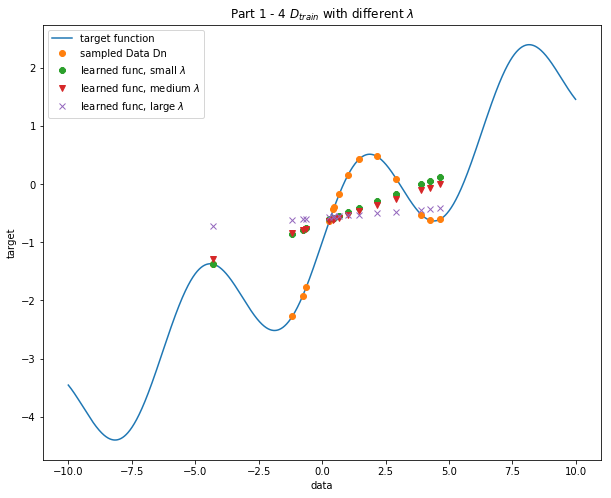

In [477]:
#initialize weights
weight = np.random.rand(1)
bias = 0

#param holders
regGDsmallParam = []
regGDMedParam = []
regGDLargeParam = []

#Small lambda
# reinit the params
weight = np.random.rand(1)
bias = 0
regGDsmall = gradDescent(weightedDecay = 0.01, stepSize = 0.00025)
regGDsmallParam = regGDsmall.regression_gradient(weight, bias, dataDn[0], dataDn[1])

weight = np.random.rand(1)
bias = 0
regGDMed = gradDescent(weightedDecay = 1, stepSize = 0.00025)
regGDMedParam = regGDMed.regression_gradient(weight, bias, dataDn[0], dataDn[1])

weight = np.random.rand(1)
bias = 0
regGDLarge = gradDescent(weightedDecay = 20, stepSize = 0.00025)
regGDLargeParam = regGDLarge.regression_gradient(weight, bias, dataDn[0], dataDn[1])

# learned functions
learnedFuncSmall = (regGDsmallParam[0] * dataDn[0]) + regGDsmallParam[1]
learnedFuncMed = (regGDMedParam[0] * dataDn[0]) + regGDMedParam[1]
learnedFuncLarge = (regGDLargeParam[0] * dataDn[0]) + regGDLargeParam[1]
#plot data function
xvals = np.arange(-10, 10, 0.01)
plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(xvals, hX(xvals), label = "target function")
plt.plot(dataDn[0], target, 'o', label="sampled Data Dn")
plt.plot(dataDn[0], learnedFuncSmall, '8', label = "learned func, small $\lambda$")
plt.plot(dataDn[0], learnedFuncMed, 'v', label = "learned func, medium $\lambda$")
plt.plot(dataDn[0], learnedFuncLarge, 'x', label = "learned func, large $\lambda$")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 1 - 4 $D_{train}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()


## 5. Sample $D_{test}$ from $h(X)$
We follow the same procedure as $D_{n}$ , training models on $\lambda$ = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100].

See the plot below:

Learned weight [0.16379211], bias [-0.66344918].
Learned weight [0.16619824], bias [-0.66601537].
Learned weight [0.1635113], bias [-0.6546355].
Learned weight [0.14945782], bias [-0.67237567].
Learned weight [0.12820497], bias [-0.63947158].
Learned weight [0.06410411], bias [-0.60980832].
Learned weight [0.00988006], bias [-0.57532735].


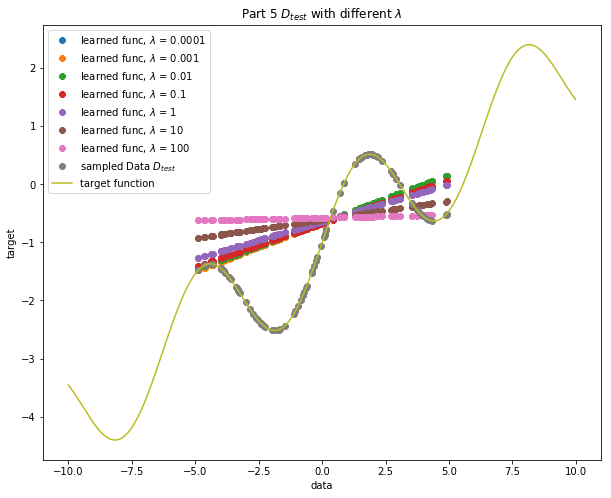

In [478]:
#sample D_test
data = np.random.uniform(-5,5,100)
target = hX(data)
dataDtest = [data, target]

lambdaVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
weight = np.random.rand(1)
bias = 0

lossArr = []

for i in lambdaVals:
    regGD = gradDescent(weightedDecay = i, stepSize = 0.00025)
    regGDParam = regGD.regression_gradient(weight, bias, dataDn[0], dataDn[1])
    
    xvals = np.arange(-10, 10, 0.01)
    plt.rcParams['figure.figsize'] = [10, 8]
    learnedFunc = (regGDParam[0] * dataDtest[0]) + regGDParam[1]
    
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr.append(loss)
    plt.plot(dataDtest[0], learnedFunc, '8', label = "learned func, $\lambda$ = {}".format(i) )    

plt.plot(dataDtest[0], dataDtest[1], 'o', label="sampled Data $D_{test}$")
plt.plot(xvals, hX(xvals), label = "target function")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 5 $D_{test}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()

### Then we plot $\lambda$  on the x-axis, and loss on the y-axis:
N.B. to TAs: we plotted $lambda$ on log scale

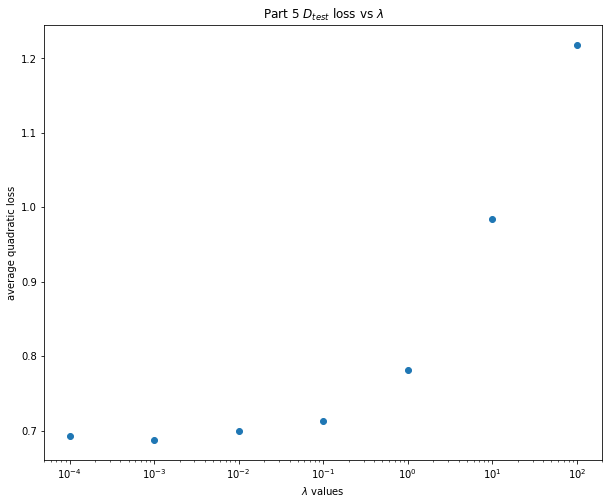

In [479]:
plt.plot(np.array(lambdaVals),np.array(lossArr), 'o')
plt.xlabel("$\lambda$ values")
plt.xticks(range(len(lambdaVals)), np.array(lambdaVals))
plt.xscale('log')
plt.ylabel("average quadratic loss")
plt.title("Part 5 $D_{test}$ loss vs $\lambda$")
plt.show()

## 6. Nonlinear preprocessing

We set $\lambda = 0.01$ and try fitting different degrees of polynomials.


## 7. Increasing $l$

We plot the the empirical risk (loss on $D_{n}$ and the true risk (loss on $D_{test}$) with increasing $l$:

mapping for degree 1...
Learning with step size 0.01 and nsteps 400
Learned weight [0.37452892], bias [-1.22651917].
mapping for degree 2...
Learning with step size 1e-05 and nsteps 4000
Learned weight [-0.50251236  0.11166134], bias [-0.2667767  0.4800656].
mapping for degree 3...
Learning with step size 1e-08 and nsteps 40000
Learned weight [-0.1283028  -0.46144093  0.17511236], bias [0.20657382 0.29740473 0.05263296].
mapping for degree 4...
Learning with step size 1e-07 and nsteps 40000
Learned weight [ 0.10689088 -0.38491968 -0.00773947  0.03954848], bias [-0.01391699  0.24054592  0.18363341  0.84898494].
learned param
 [[array([0.37452892]), array([-1.22651917])], [array([-0.50251236,  0.11166134]), array([-0.2667767,  0.4800656])], [array([-0.1283028 , -0.46144093,  0.17511236]), array([0.20657382, 0.29740473, 0.05263296])], [array([ 0.10689088, -0.38491968, -0.00773947,  0.03954848]), array([-0.01391699,  0.24054592,  0.18363341,  0.84898494])]]


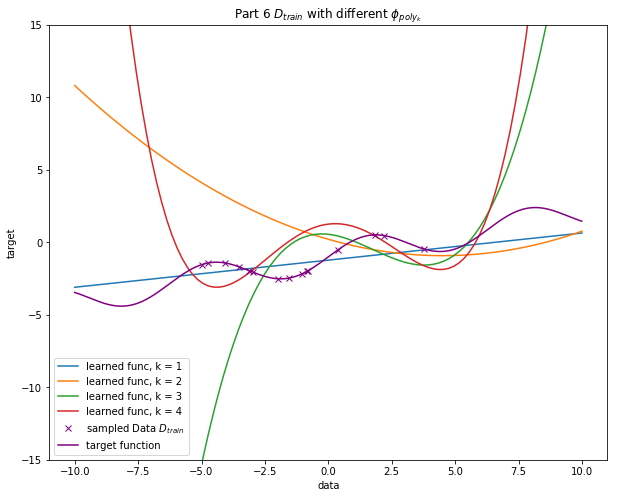

In [691]:
kDegreeArr = [1, 2, 3, 4]
stepsizeArr = [0.01, 0.00001, 0.00000001, 0.0000001]#, 0.001, 0.01, 0.1]
numStepArr = [400, 4000, 40000, 40000] #, 400000]

plt.rcParams['figure.figsize'] = [10, 8]
plt.ylim(top = 15, bottom=-15)

lossArr_train = []
lossArr_test = []
learned_param = []

np.random.seed(1)

# Function to do a mapping from a 1d X.
def to_map(input_data, k):
    if k == 1: # Do nothing
        return input_data
    to_map = [input_data]
    for i in range(2, k+1): # kDegreeArr[j]+1):
        raised = np.power(input_data, i)
        to_map.append(raised)
    dataK = np.column_stack(to_map)[0]
    return dataK
    
for k in kDegreeArr:
    # Initialize weights and bias randomly according to degree
    weight = np.random.rand(k)
    bias = np.random.rand(k)
    
    # Do the mapping
    print("mapping for degree {}...".format(k))
    dataDM = []
    for data in dataDn[0]:
        dataDM.append(to_map(data, k))
    dataDM = np.array(dataDM)
    #print("Mapped {} \n to \n {}.".format(dataDn[0], dataDM))

    dataK = np.array(np.linspace(-5, 5, 100))
    dataKn = [dataK , hX(dataK)]
    #print('datak_orig', dataK)
    dataKM = []
    for data in dataK:
        dataKM.append(to_map(data, k))
    dataKM = np.array(dataKM)
    #print('dataKM', dataKM)
    
    targetsM = []
    for target in dataDn[1]:
        targetsM.append(to_map(target, k))
    targetsM = np.array(targetsM)
    #print("targets:", targetsM)

    # Do the descent
    print('Learning with step size {} and nsteps {}'.format(stepsizeArr[kDegreeArr.index(k)], numStepArr[kDegreeArr.index(k)]))
    regGD = gradDescent(weightedDecay = 0.01, 
                        stepSize = stepsizeArr[kDegreeArr.index(k)],
                        numberSteps= numStepArr[kDegreeArr.index(k)])
    regGDParam = regGD.regression_gradient(weight, bias, dataDM, targetsM)
    learned_param.append([regGDParam[0], regGDParam[1]])
    print('Learned weight {}, bias {}.'.format(regGDParam[0], regGDParam[1]))
    
    # Plot
    learnedFunc, learnedFunc_plot = [], []
    for i, point in enumerate(dataDM):
        learnedFunc.append(np.dot(regGDParam[0], point) + regGDParam[1])
        #learnedFunc_plot.append(regGDParam[0] * dataKM[i] + regGDParam[1])
    learnedFunc = np.array(learnedFunc)
    #learnedFunc_plot = np.array(learnedFunc_plot)
    #if k != 1:
    learnedFunc = np.sum(learnedFunc, axis = 1)
    #learnedFunc_plot = np.sum(learnedFunc_plot, axis = 1)
    """learnedFunc_plot = regGDParam[0] * dataKM + regGDParam[1]
    learnedFunc = regGDParam[0] * dataDM + regGDParam[1]
    if k != 1:
        #print('learnedFunc', learnedFunc)
        learnedFunc = np.sum(learnedFunc, axis = 1)
        learnedFunc_plot = np.sum(learnedFunc_plot, axis = 1)
        #learnedFunc = np.sum(learnedFunc, axis = 1)"""
    

    
    dataK = np.array(np.linspace(-10, 10, 100))
    for point in dataKM:
        learnedFunc_plot.append(np.dot(regGDParam[0], point) + regGDParam[1])
    learnedFunc_plot = np.array(learnedFunc_plot)
    learnedFunc_plot = np.sum(learnedFunc_plot, axis = 1)
    #print('dataK', dataK)
    #print('learnedFunc', learnedFunc)
    plt.plot(dataK, learnedFunc_plot, label = "learned func, k = {}".format(k)) 
    #plt.scatter(dataDn[0], learnedFunc, label = "learned func, k = {}".format(k))
    
    # Calculate training error (for next part)
    #loss = np.mean((learnedFunc - dataKn[1])**2)
    loss = np.mean((learnedFunc - dataDn[1])**2)
    lossArr_train.append(loss)
        
#learned_param = np.array(learned_param)
print('learned param\n', learned_param)
    
xvals = np.arange(-10, 10, 0.01)    
plt.plot(dataDn[0], dataDn[1], 'x', label="sampled Data $D_{train}$", color="purple")
plt.plot(xvals, hX(xvals), label = "target function", color="purple")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 6 $D_{train}$ with different $\phi_{{poly}_k}$")
plt.legend(loc='best')
plt.show()

[[array([0.37452892]), array([-1.22651917])], [array([-0.50251236,  0.11166134]), array([-0.2667767,  0.4800656])], [array([-0.1283028 , -0.46144093,  0.17511236]), array([0.20657382, 0.29740473, 0.05263296])], [array([ 0.10689088, -0.38491968, -0.00773947,  0.03954848]), array([-0.01391699,  0.24054592,  0.18363341,  0.84898494])]]


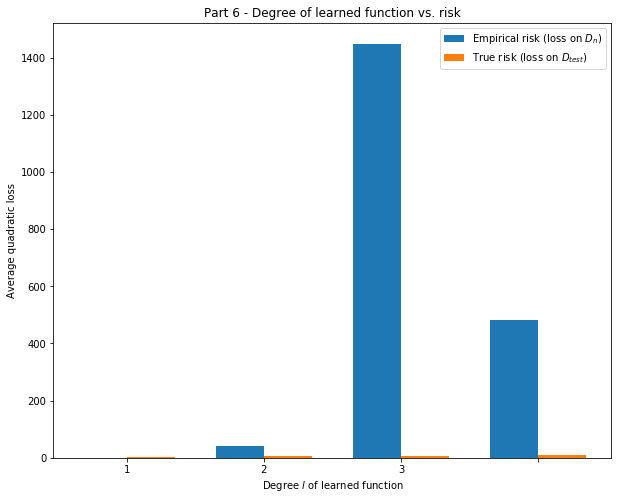

In [682]:
# Already got training loss, so now get testing loss:
lossArr_test = []
print(learned_param)
for k in kDegreeArr:    
    # Get the function
    
    learnedFunc = []
    for point in dataDtest[0]:
        learnedFunc.append(np.dot(learned_param[k-1][0], point) + learned_param[k-1][1])
    learnedFunc = np.array(learnedFunc)
    if k != 1:
        learnedFunc = np.sum(learnedFunc, axis = 1)
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr_test.append(loss)

# Plot
ind = np.arange(len(kDegreeArr))
width = 0.35  

plt.bar(ind, np.array(lossArr_train), width, label="Empirical risk (loss on $D_{n}$)")
plt.bar(ind + width, np.array(lossArr_test), width, label="True risk (loss on $D_{test}$)")
plt.xlabel("Degree $l$ of learned function")
plt.ylabel("Average quadratic loss")
plt.title("Part 6 - Degree of learned function vs. risk")

plt.xticks(ind + width / 2, ('1', '2', '3'))
plt.legend(loc='best')
plt.show()

### for readibility, we plot the error and learned function when Poly degree = 4 separately

weight size,  (4,)


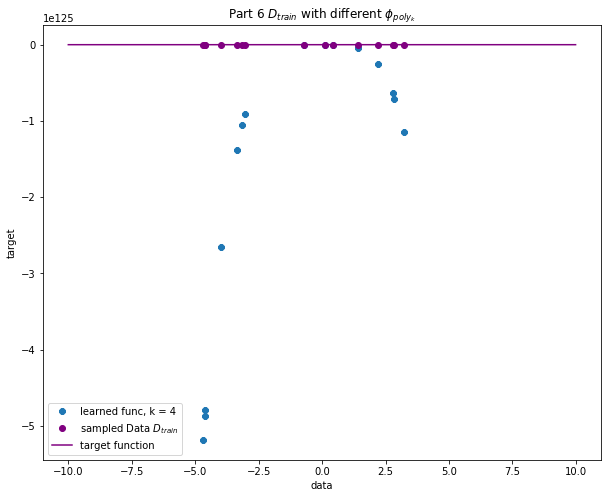

weight size,  (4,)
train loss dim = 4 is [5.782207818645246e+250]
test loss dim = 4 is [2.5702020782900857e+277]


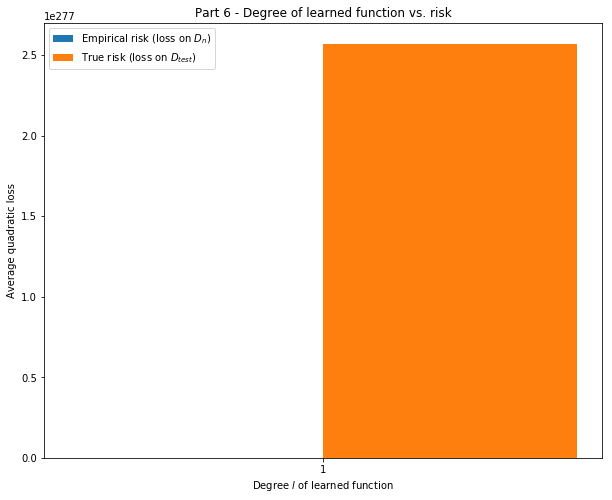

In [8]:
kDegreeArr = [4]#[1, 2, 3]
weight = np.random.rand(1)
bias = 0

plt.rcParams['figure.figsize'] = [10, 8]

lossArr_train = []
lossArr_test = []

# Function to do a mapping from a 1d X.
def to_map(input_data, k):
    to_map = [input_data[0]]
    for i in range(2, k+1): # kDegreeArr[j]+1):
        raised = np.power(input_data[0], k)
        to_map.append(raised)
    dataK = np.column_stack(to_map)
    dataKn = [dataK, input_data[1]] #same target
    return dataK, dataKn
    
for k in kDegreeArr:
    # Do the mapping
    dataK, dataKn = to_map(dataDn, k)
    
    # Do the descent
    regGD = gradDescent(weightedDecay = 0.01, stepSize = 0.0001)
    regGDParam = regGD.regression_gradient(weight, bias, dataKn[0], dataKn[1])
    
    # Plot
    learnedFunc = regGDParam[0] * dataK + regGDParam[1]
    learnedFunc = np.sum(learnedFunc, axis = 1)
    plt.plot(dataDn[0], learnedFunc, '8', label = "learned func, k = {}".format(k)) 
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDn[1])**2)
    lossArr_train.append(loss)
    
xvals = np.arange(-10, 10, 0.01)    
plt.plot(dataDn[0], dataDn[1], 'o', label="sampled Data $D_{train}$", color='purple')
plt.plot(xvals, hX(xvals), label = "target function", color='purple')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 6 $D_{train}$ with different $\phi_{{poly}_k}$")
plt.legend(loc='best')
plt.show()


# Already got training loss, so now get testing loss:
lossArr_test = []
for k in kDegreeArr:
    # Do the mapping
    dataK, dataKn = to_map(dataDtest, k)
    
    # Do the descent
    regGD = gradDescent(weightedDecay = 0.01, stepSize = 0.0001)
    regGDParam = regGD.regression_gradient(weight, bias, dataKn[0], dataKn[1])
    
    # Get the function
    learnedFunc = regGDParam[0] * dataK + regGDParam[1]
    learnedFunc = np.sum(learnedFunc, axis = 1)
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr_test.append(loss)

print("train loss dim = 4 is", lossArr_train)
print("test loss dim = 4 is", lossArr_test)
# Plot
ind = np.arange(len(kDegreeArr))
width = 0.35  

plt.bar(ind, np.array(lossArr_train), width, label="Empirical risk (loss on $D_{n}$)")
plt.bar(ind + width, np.array(lossArr_test), width, label="True risk (loss on $D_{test}$)")
plt.xlabel("Degree $l$ of learned function")
plt.ylabel("Average quadratic loss")
plt.title("Part 6 - Degree of learned function vs. risk")

plt.xticks(ind + width / 2, ('1', '2', '3'))
plt.legend(loc='best')
plt.show()

When $l$ increases to 3 and 4, the test error is significantly higher than dim  = 1, 2, 3. The best $l$ with lesat loss is $l = 2$ This shows that the model overfits when the feature mapping maps to a high dimension, in this case $\ge 4$. We can also visualize that we draw our data from a true target function, which is a polynomial of degree $=2$, and using a polynomial of $degree = 4$ is not a good approach.